In [118]:
from sklearn.cluster import KMeans
import numpy as np

import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import uproot

In [4]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [10]:
dataDir = '../data/'

In [11]:
tree = uproot.open(dataDir+'oneNewKINNW_MC16e.root')[b'features;2']

In [15]:
spin_list = [b'c_nn',
 b'NW_c_nn',
 b'KIN_c_nn']

In [16]:
spin_array = get_input_arrays(tree, spin_list)

(55846, 3)
[-0.22836393 -0.45447155 -0.27665773]


In [81]:
features_list = [b'reco_lep_p_pt',
                 b'reco_lep_n_pt',
                 b'reco_met',
                 b'reco_met_phi',
                 b'reco_lep_p_pt',
                 b'reco_lep_p_eta',
                 b'reco_lep_p_phi',
                 b'reco_lep_p_e',
                 b'reco_lep_n_pt',
                 b'reco_lep_n_eta',
                 b'reco_lep_n_phi',
                 b'reco_lep_n_e',
                 b'reco_jet_0_pt',
                 b'reco_jet_0_eta',
                 b'reco_jet_0_phi',
                 b'reco_jet_0_e',
                 b'reco_bjet_0_e',
                 b'reco_jet_1_pt',
                 b'reco_jet_1_eta',
                 b'reco_jet_1_phi',
                 b'reco_jet_1_e',
                 b'reco_bjet_1_e',
                 b'reco_jet_2_pt',
                 b'reco_jet_2_eta',
                 b'reco_jet_2_phi',
                 b'reco_jet_2_e',
                 b'reco_bjet_2_e',
                 b'reco_njets',
                 b'reco_lep_delta_phi',
                 b'reco_lep_delta_eta']

In [129]:
features_array = get_input_arrays(tree, features_list)

(55846, 30)
[ 7.32048281e+04  4.40991406e+04  7.04442031e+04  1.97376204e+00
  7.32048281e+04 -2.58735389e-01 -1.16389930e+00  7.56689141e+04
  4.40991406e+04 -2.24167752e+00 -2.21246004e+00  2.09810094e+05
  5.11211914e+04 -3.97971272e-01 -2.24426079e+00  5.57083594e+04
 -6.31833434e-01  4.16313828e+04 -5.26064336e-01  1.06392336e+00
  4.78393008e+04 -8.97042930e-01  3.50282070e+04  4.95823473e-01
  7.02036977e-01  3.97163633e+04 -8.99980068e-01  3.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [83]:
NW_diff = spin_array[:,1] - spin_array[:,0]

In [84]:
KIN_diff = spin_array[:,2] - spin_array[:,0]

In [85]:
test = KIN_diff.reshape(-1,1)

In [189]:
RECO_diff = NW_diff * NW_diff - KIN_diff * KIN_diff

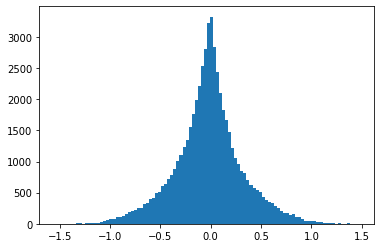

In [192]:
_=plt.hist(RECO_diff,bins=100)

In [193]:
#x_train  = features_array
#x_train  = np.concatenate((features_array, NW_diff.reshape(-1,1), KIN_diff.reshape(-1,1)),axis=1)
x_train  = np.concatenate((features_array, RECO_diff.reshape(-1,1)),axis=1)
#x_train  = spin_array

In [195]:
#x = np.concatenate((x_train, x_test))
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=2, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x_train)

In [196]:
label0 = np.where(y_pred_kmeans == 0)[0]
label1 = np.where(y_pred_kmeans == 1)[0]
#label2 = np.where(y_pred_kmeans == 2)[0]
#label3 = np.where(y_pred_kmeans == 3)[0]

In [197]:
#fig,ax=plt.subplots(figsize=(10,10))
#_=plt.hist2d(features_array[:,0], KIN_diff,bins=100)
#_=plt.hist2d(features_array[:,0], NW_diff,color='green',alpha=.15)

In [198]:
#fig,ax=plt.subplots(figsize=(10,10))
#_=plt.hist2d(features_array[:,0], NW_diff,bins=100)

b'reco_lep_p_pt'   0


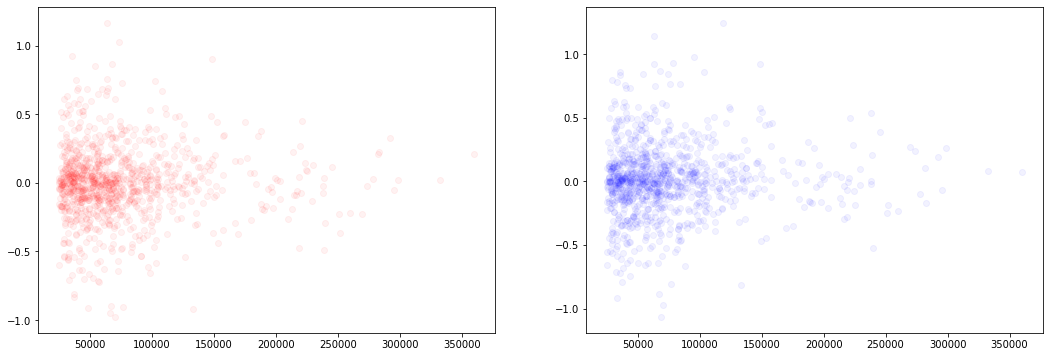

b'reco_lep_n_pt'   1


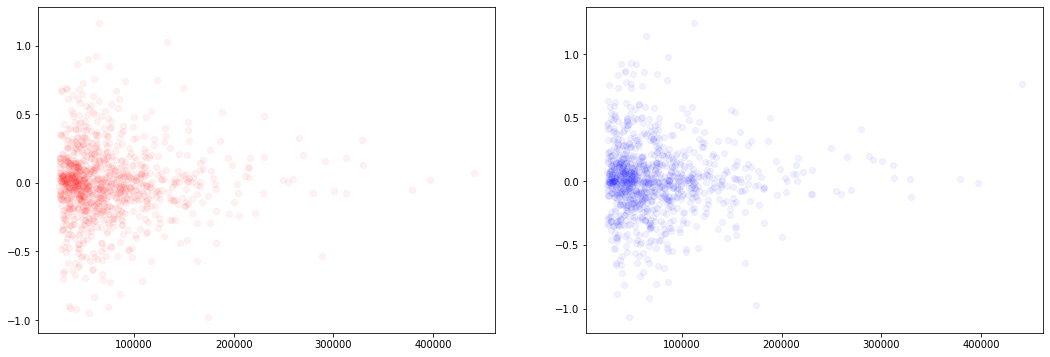

b'reco_met'   2


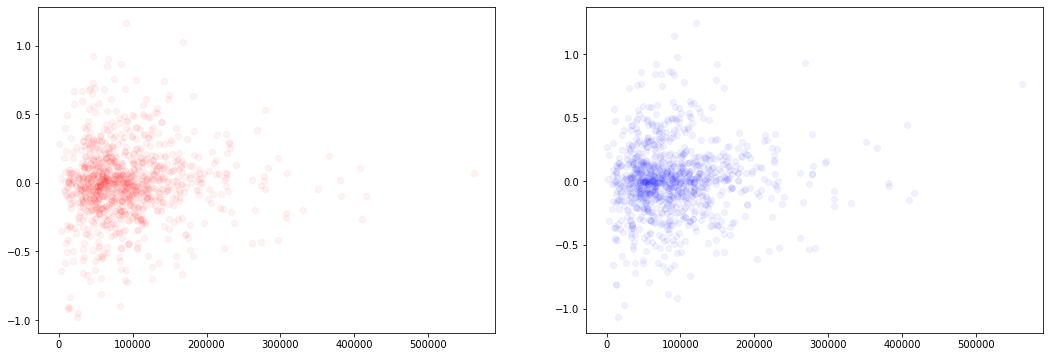

b'reco_met_phi'   3


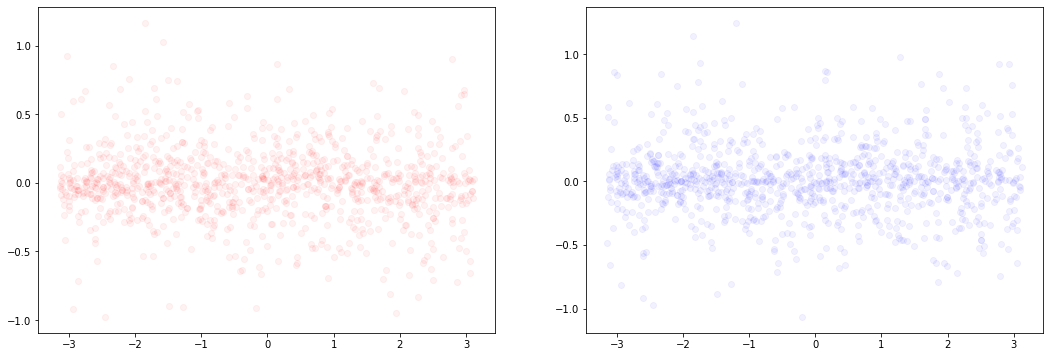

b'reco_lep_p_pt'   4


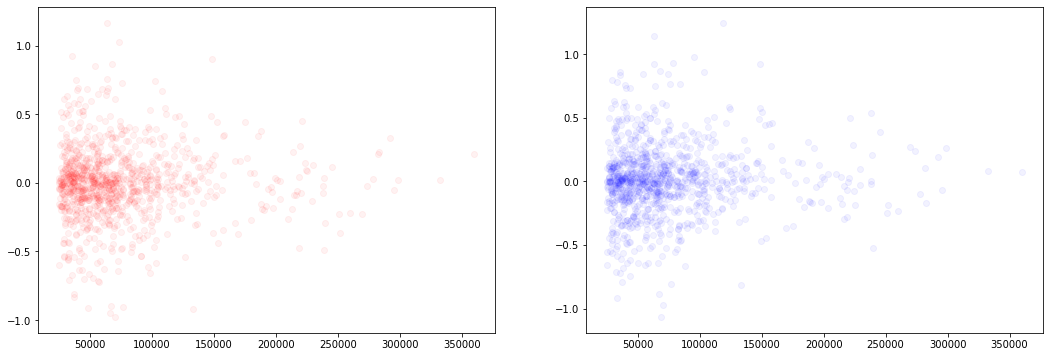

b'reco_lep_p_eta'   5


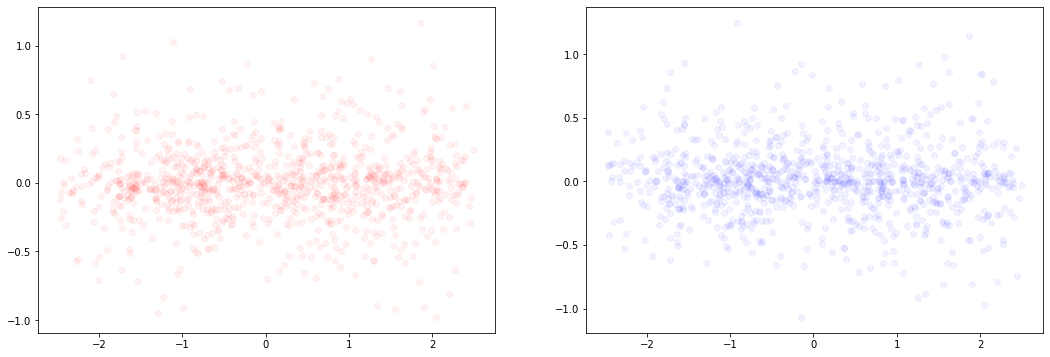

b'reco_lep_p_phi'   6


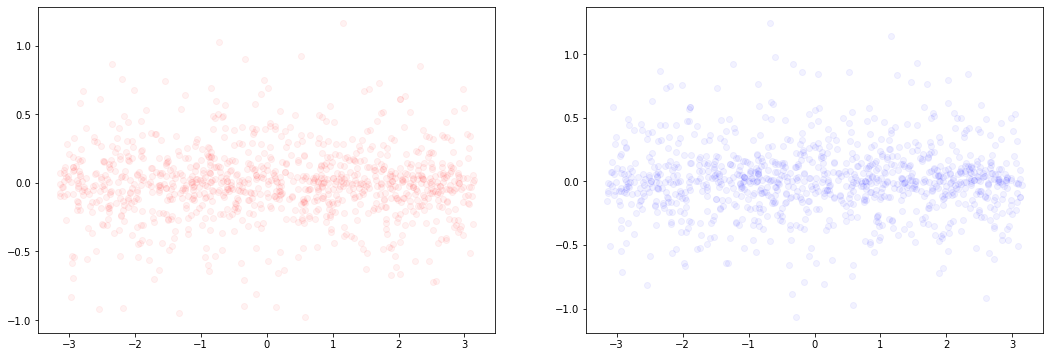

b'reco_lep_p_e'   7


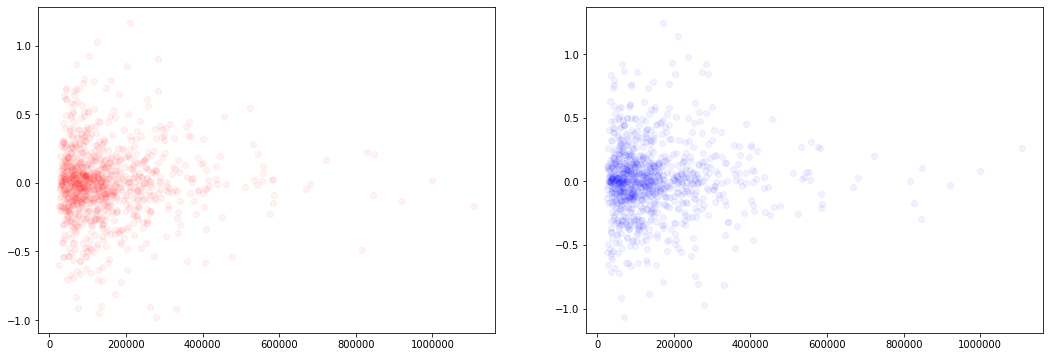

b'reco_lep_n_pt'   8


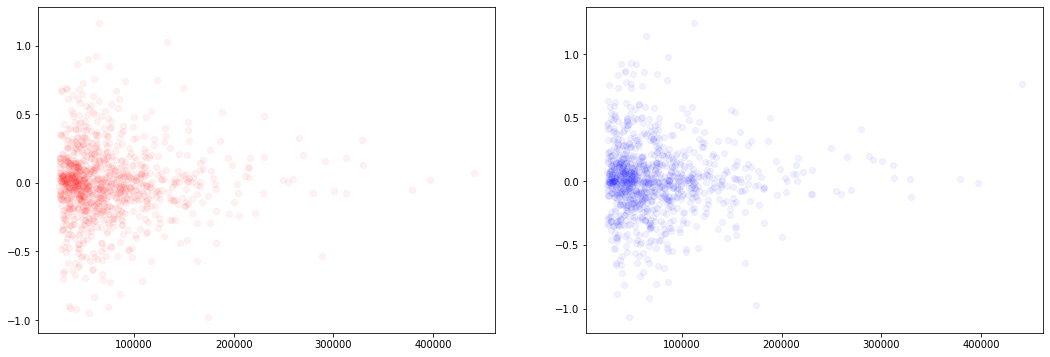

b'reco_lep_n_eta'   9


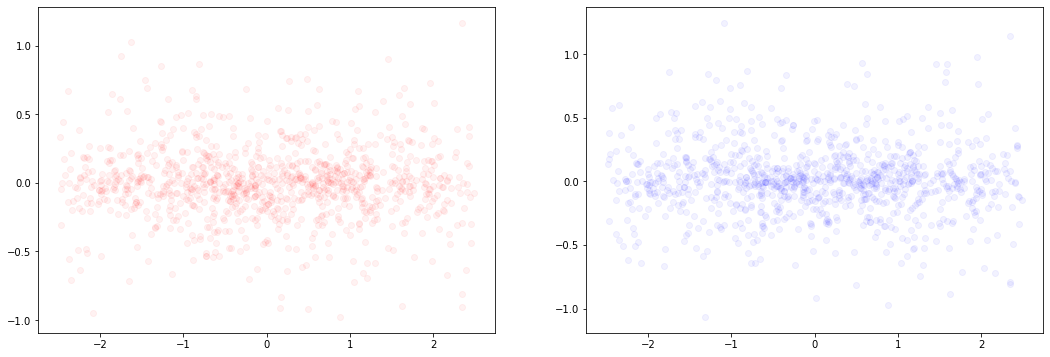

b'reco_lep_n_phi'   10


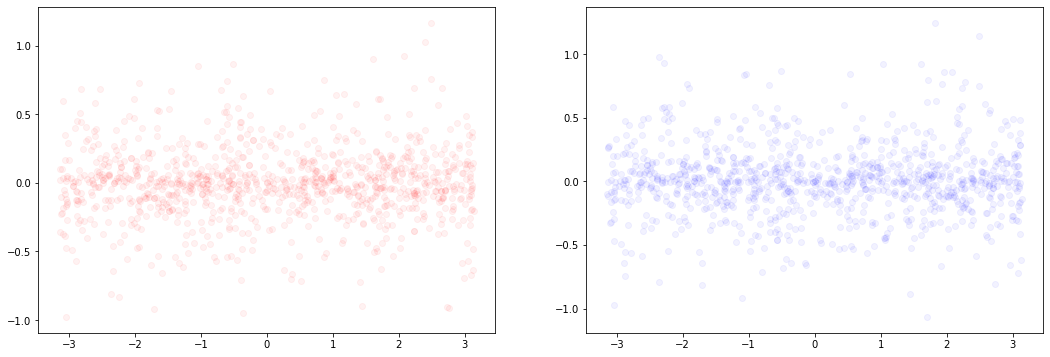

b'reco_lep_n_e'   11


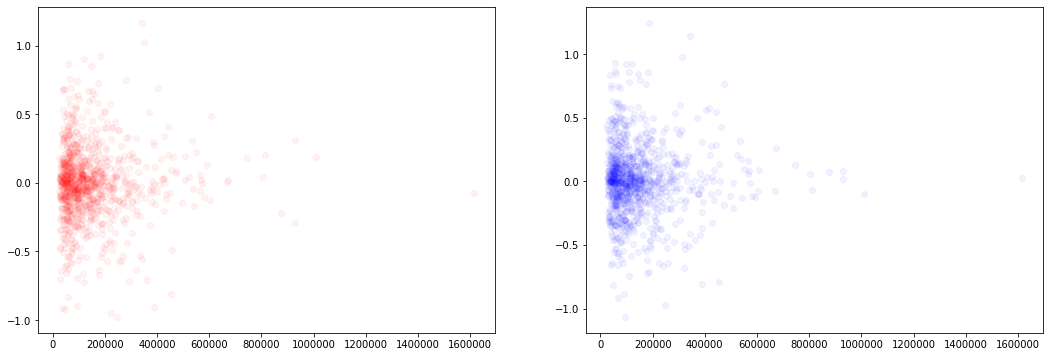

b'reco_jet_0_pt'   12


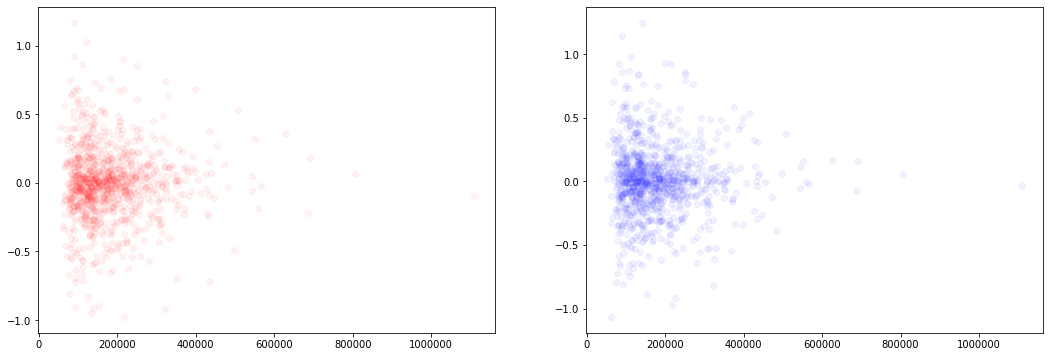

b'reco_jet_0_eta'   13


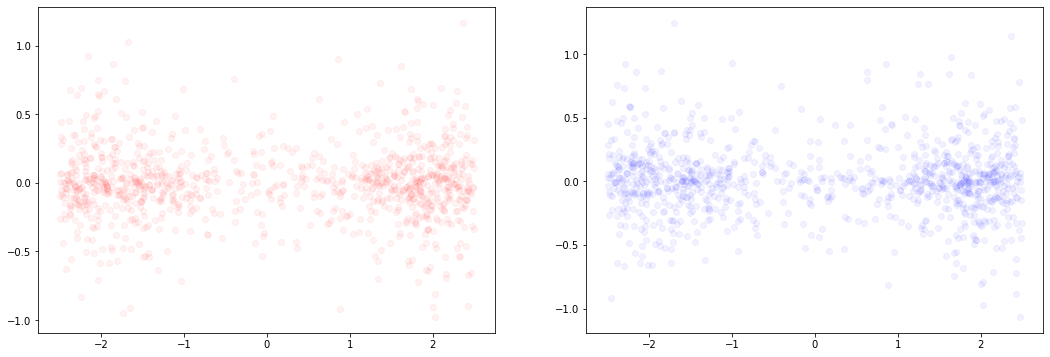

b'reco_jet_0_phi'   14


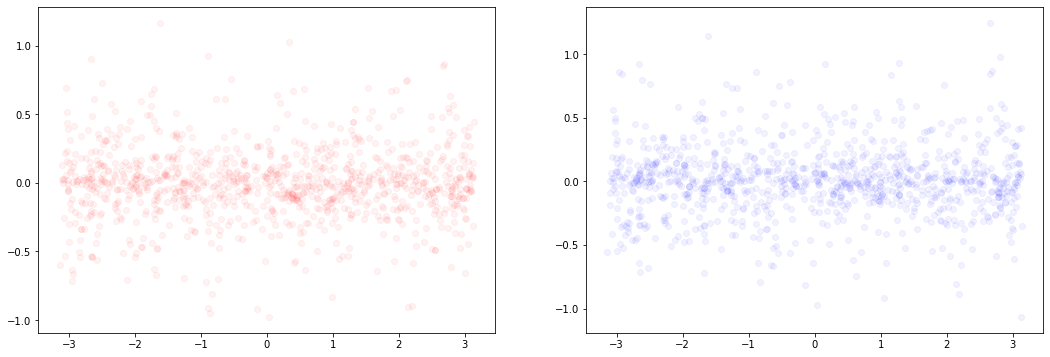

b'reco_jet_0_e'   15


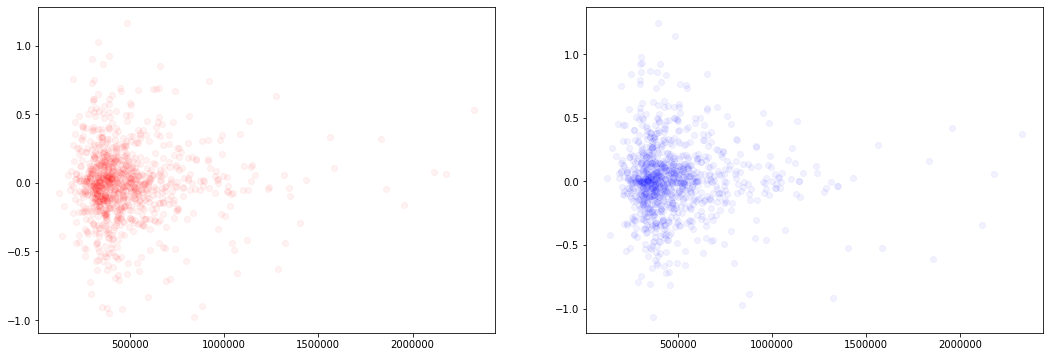

b'reco_bjet_0_e'   16


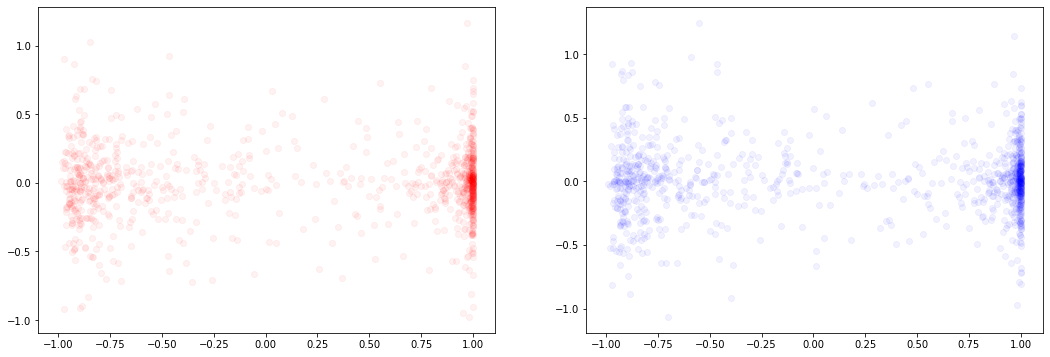

b'reco_jet_1_pt'   17


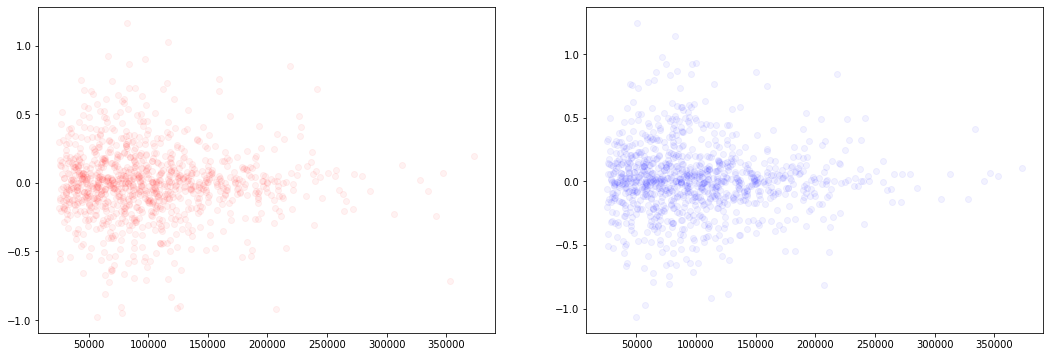

b'reco_jet_1_eta'   18


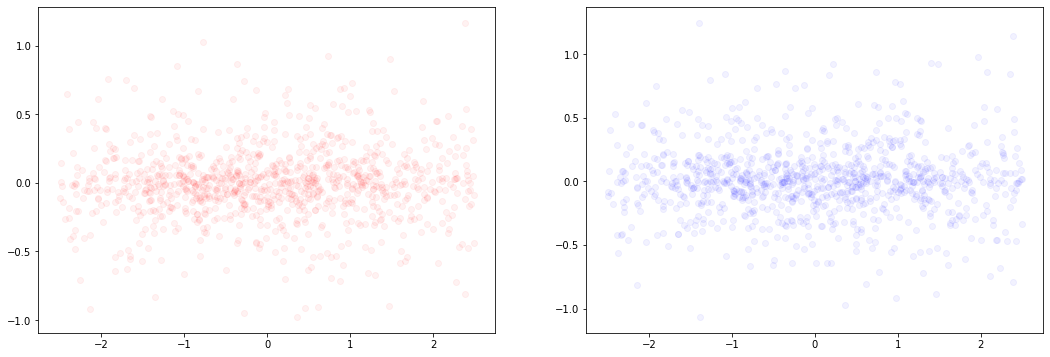

b'reco_jet_1_phi'   19


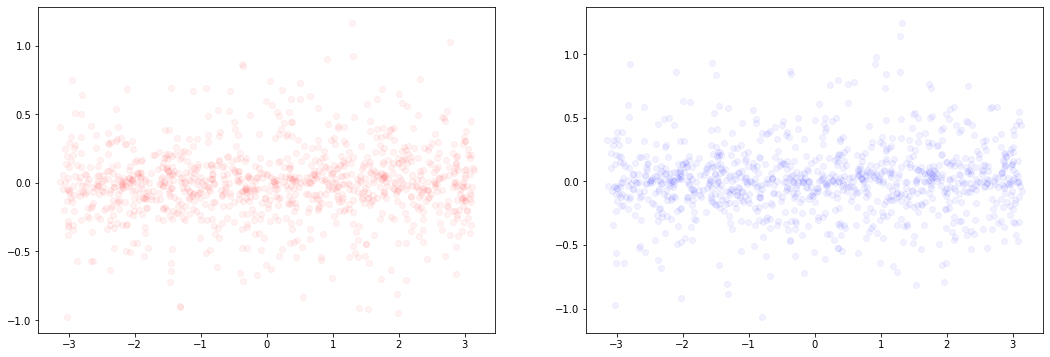

b'reco_jet_1_e'   20


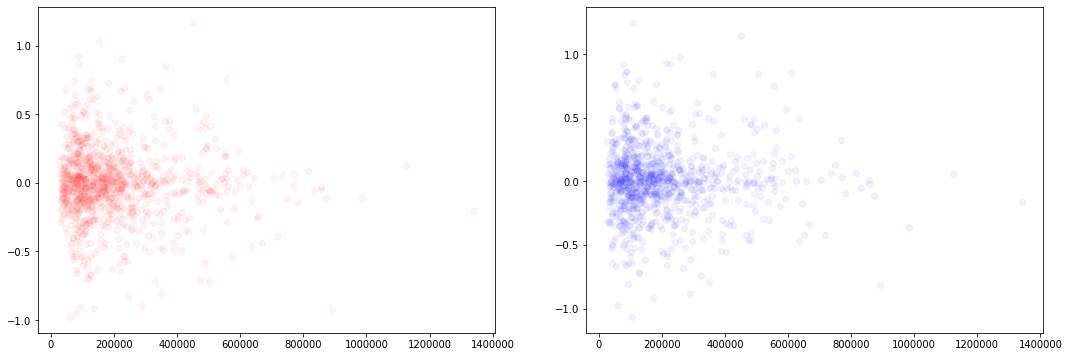

b'reco_bjet_1_e'   21


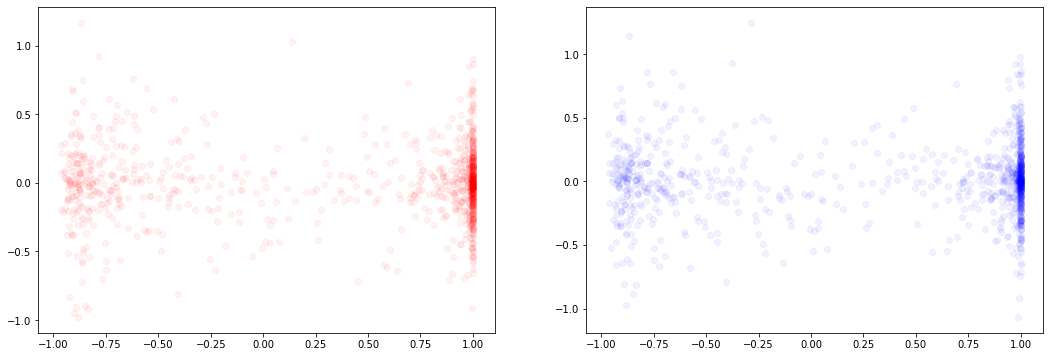

b'reco_jet_2_pt'   22


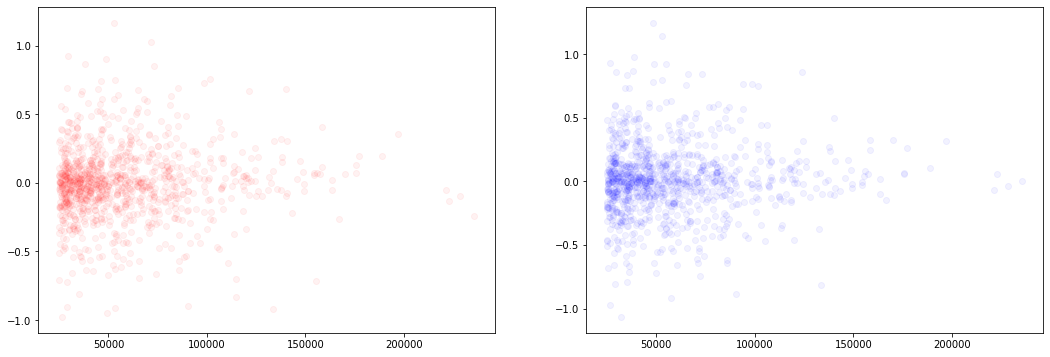

b'reco_jet_2_eta'   23


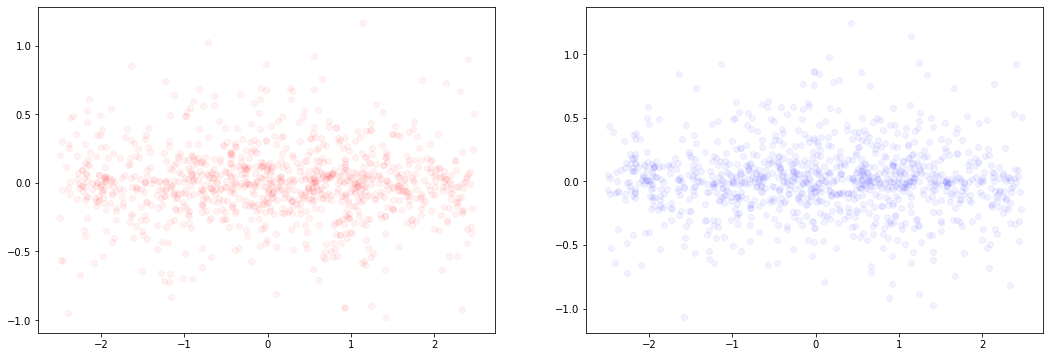

b'reco_jet_2_phi'   24


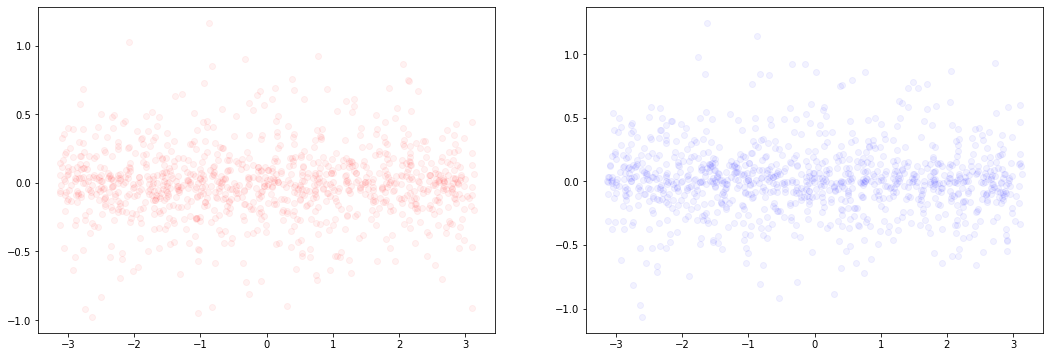

b'reco_jet_2_e'   25


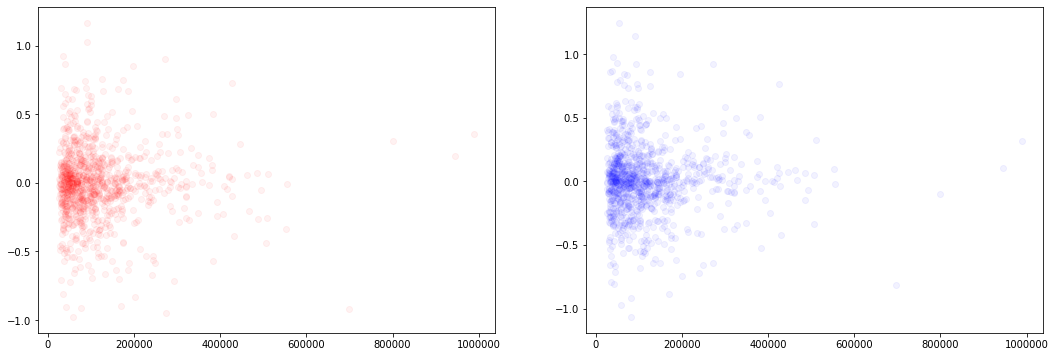

b'reco_bjet_2_e'   26


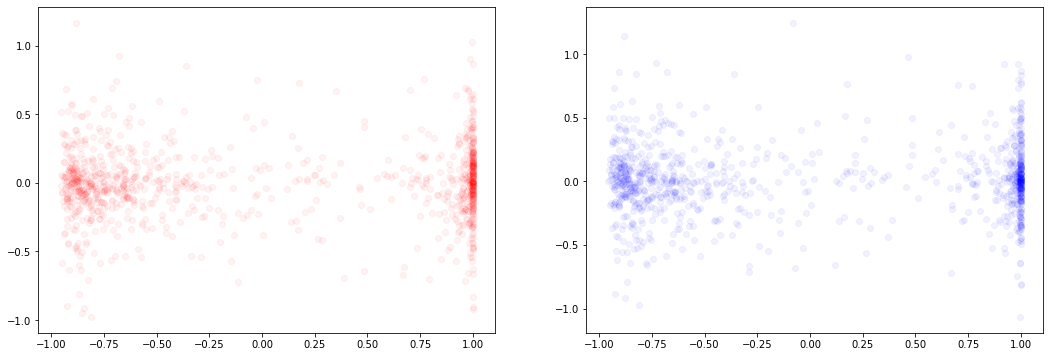

b'reco_njets'   27


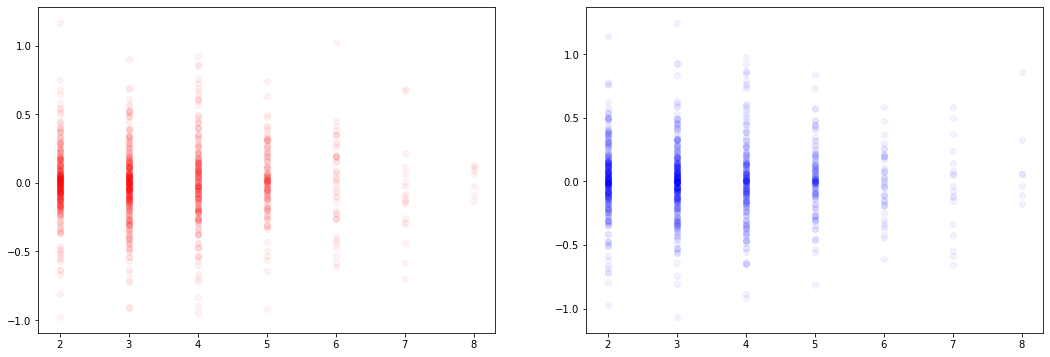

b'reco_lep_delta_phi'   28


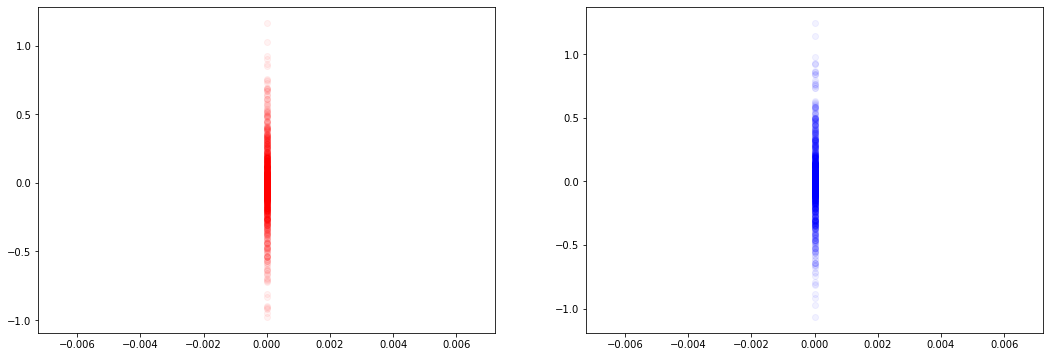

b'reco_lep_delta_eta'   29


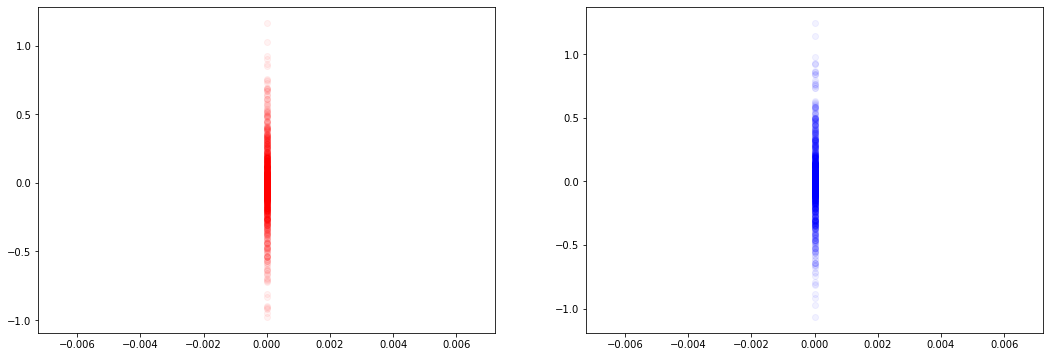

IndexError: list index out of range

In [200]:
for i in range(x_train.shape[1]):
    print(features_list[i],' ',i)
    fig,ax=plt.subplots(1,2,figsize=(18,6))
    _=ax[0].scatter(features_array[label0,i][:1000], KIN_diff[label0][:1000],color='red',alpha=.05)
    _=ax[1].scatter(features_array[label0,i][:1000], KIN_diff[label1][:1000],color='blue',alpha=.05)
    #_=ax[2].scatter(features_array[label2,i][:1000], NW_diff[label2][:1000],color='green',alpha=.05)
    #_=ax[3].scatter(features_array[label3,i][:1000], NW_diff[label3][:1000],color='purple',alpha=.05)
    plt.show()

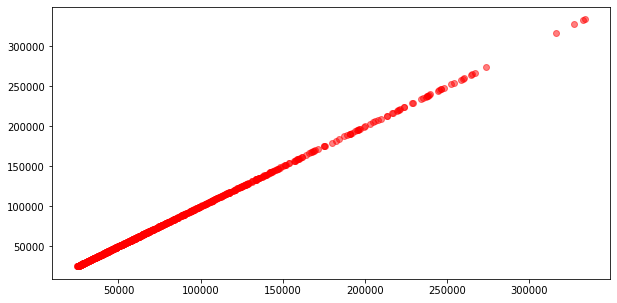

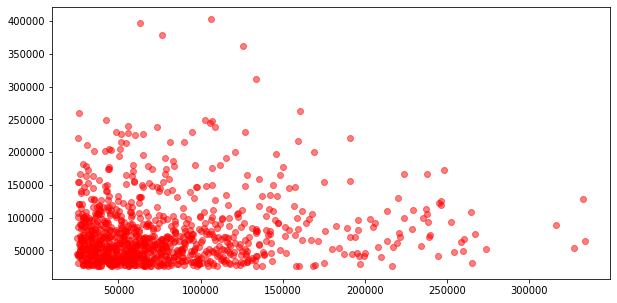

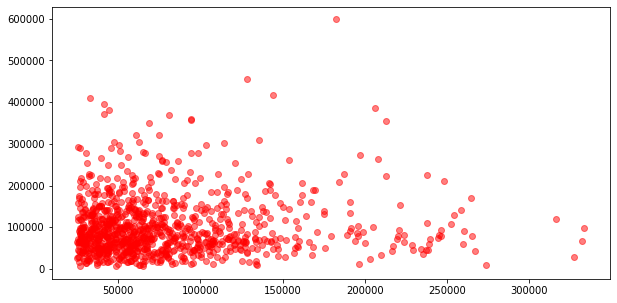

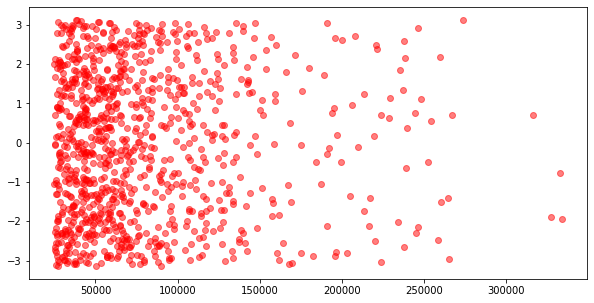

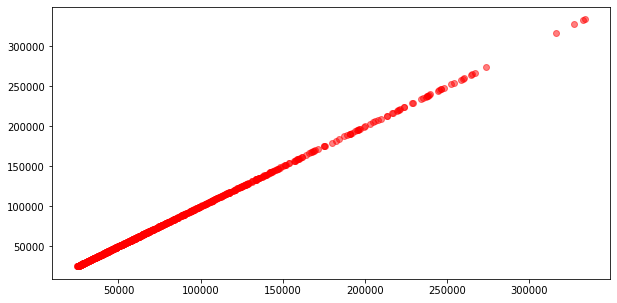

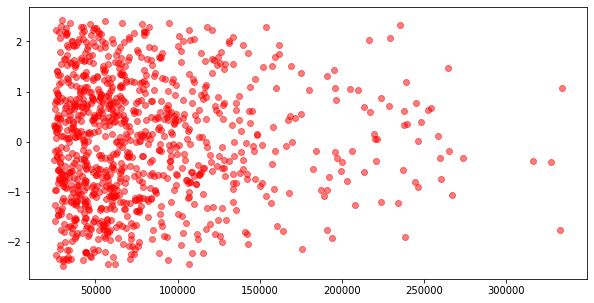

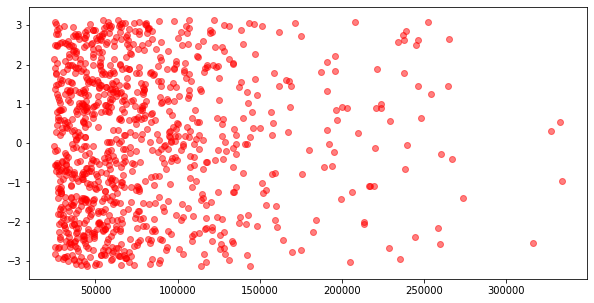

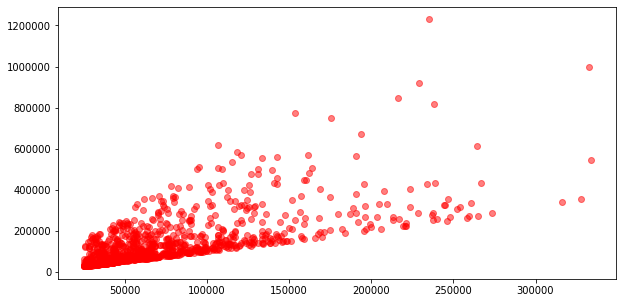

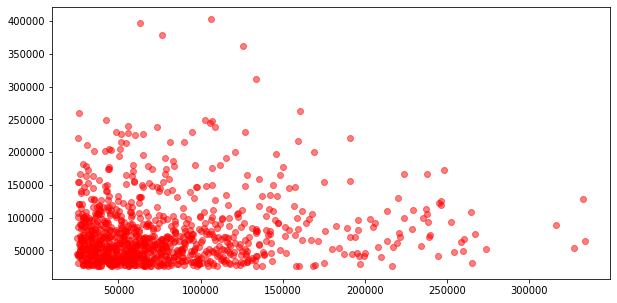

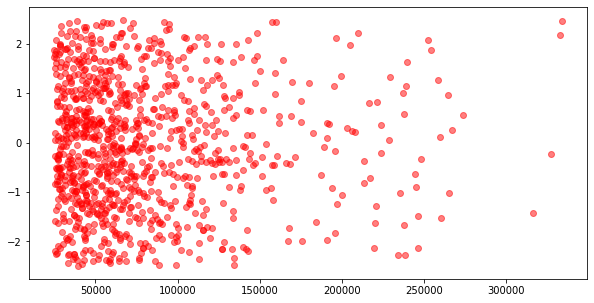

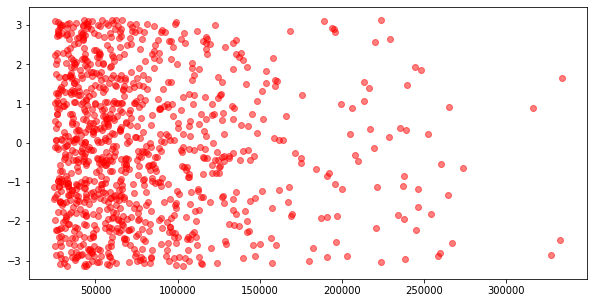

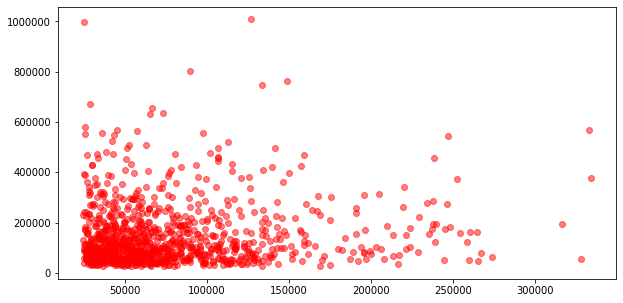

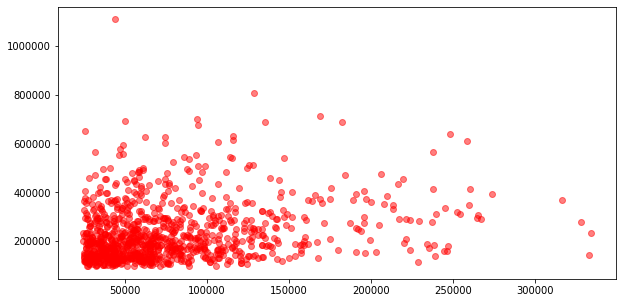

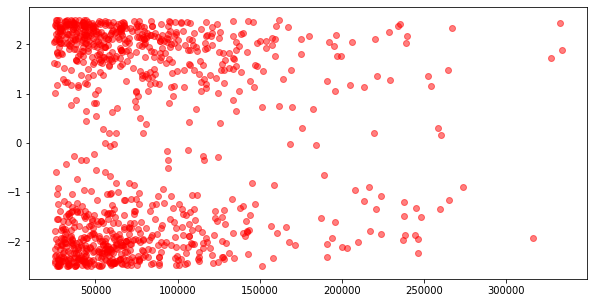

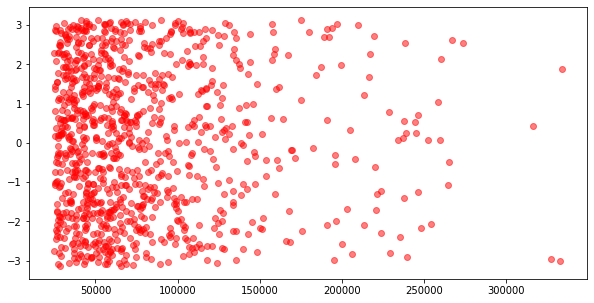

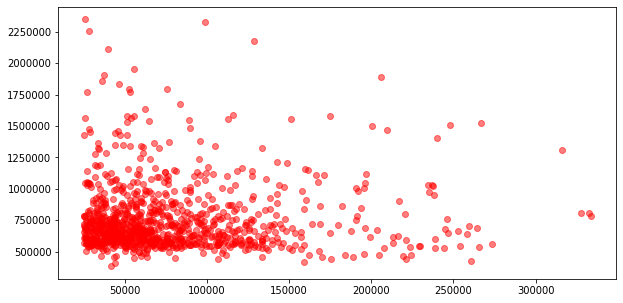

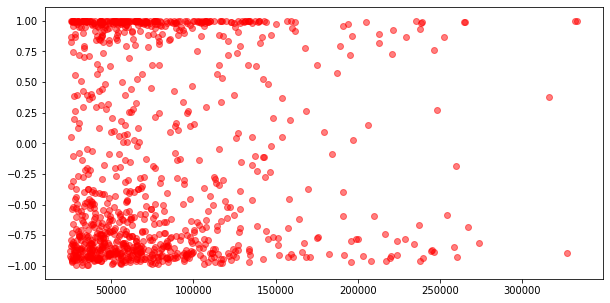

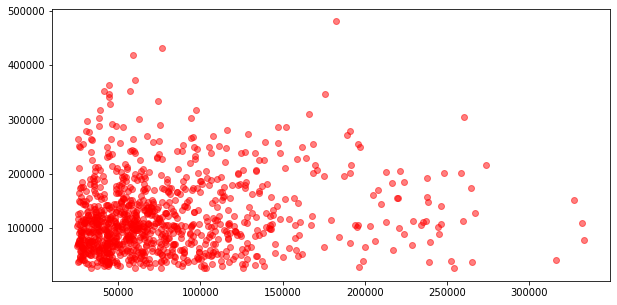

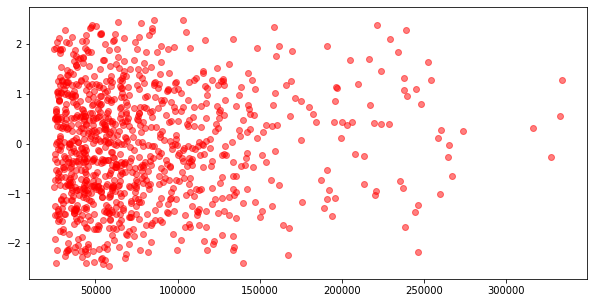

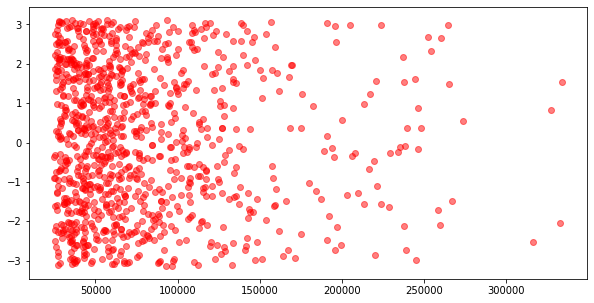

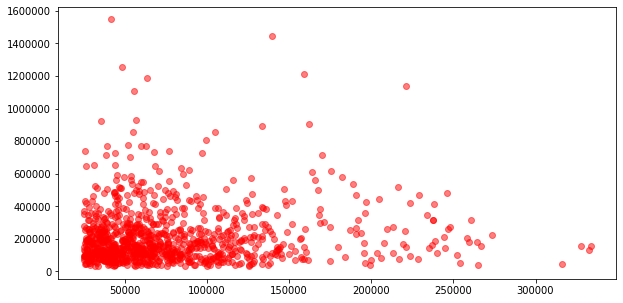

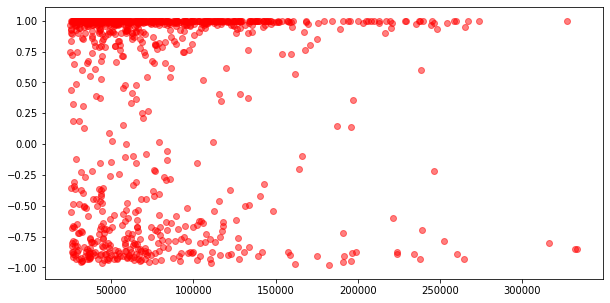

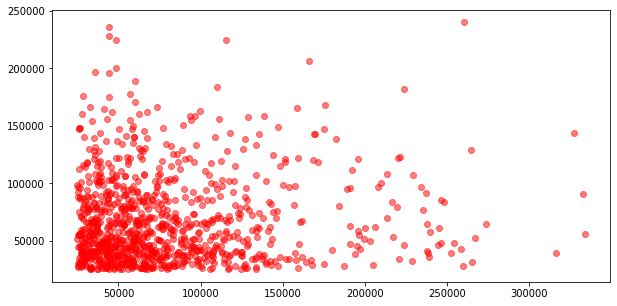

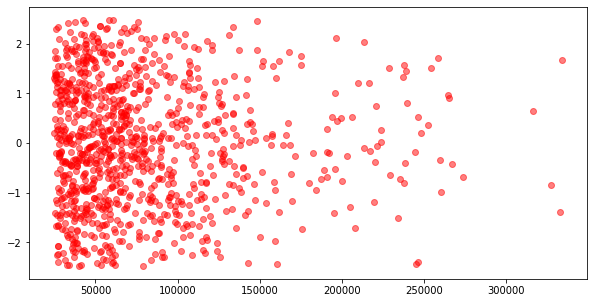

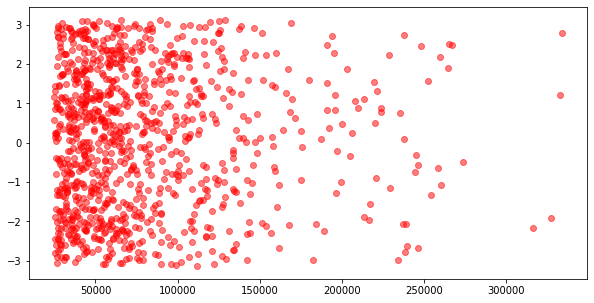

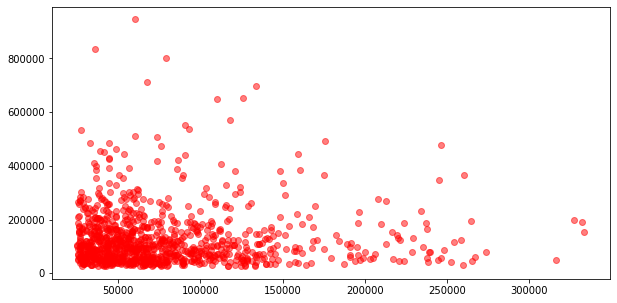

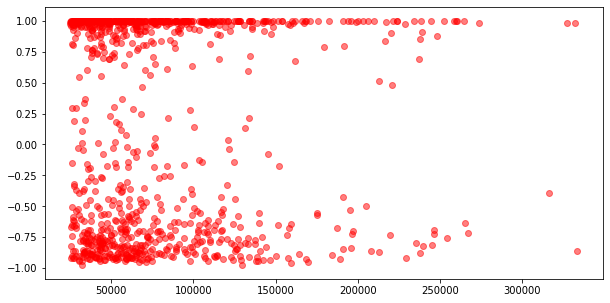

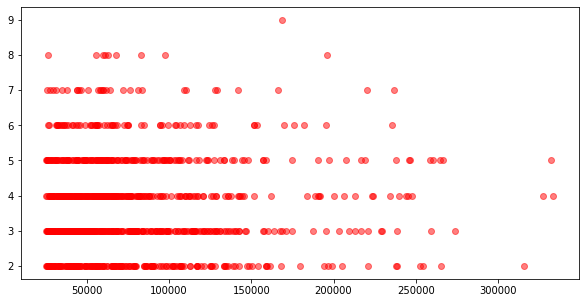

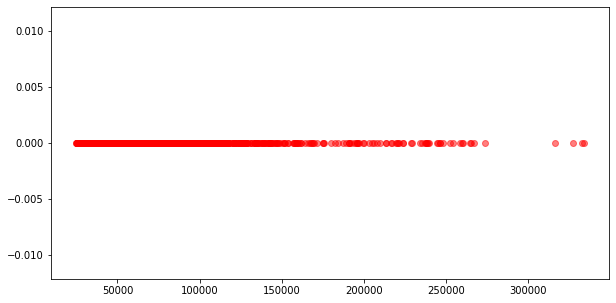

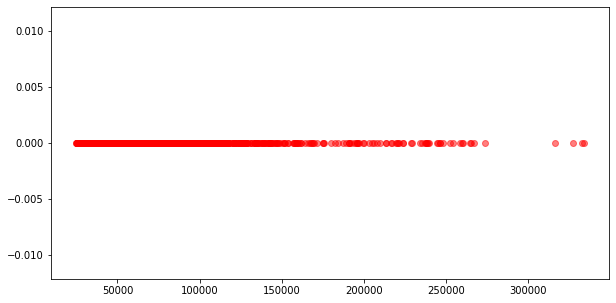

IndexError: index 30 is out of bounds for axis 1 with size 30

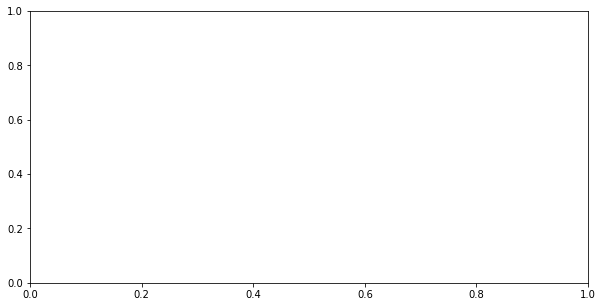

In [188]:
for i in range(x_train.shape[1]):
    for j in range(x_train.shape[1]):
        #print(features_list[i],' ',i)
        fig,ax=plt.subplots(figsize=(10,5))
        _=plt.scatter(features_array[label3,i][:1000], features_array[label3,j][:1000],color='red',alpha=0.5)
        #_=ax[1].scatter(features_array[label3,i][:1000], NW_diff[label3][:1000],color='blue',alpha=0.5)
        plt.show()

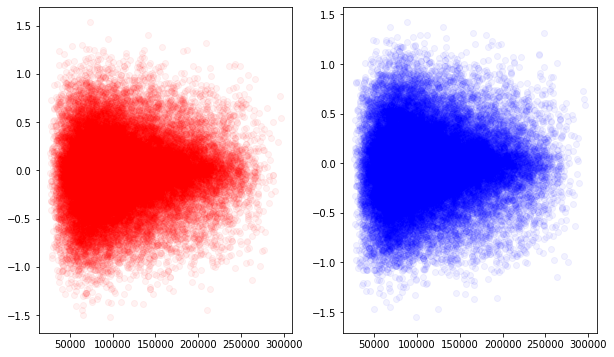

In [174]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
_=ax[0].scatter(features_array[label0,15], KIN_diff[label0],color='red',alpha=.05)
_=ax[1].scatter(features_array[label0,15], NW_diff[label0],color='blue',alpha=.05)

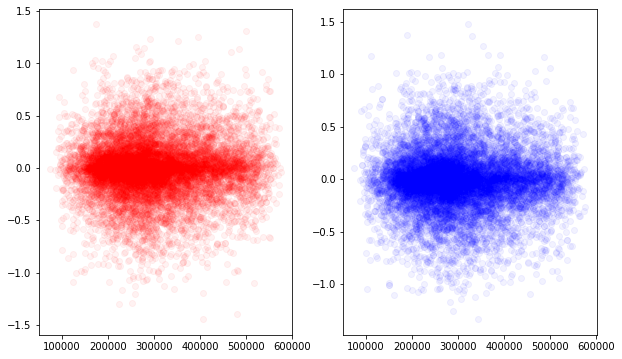

In [178]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
_=ax[0].scatter(features_array[label1,15], KIN_diff[label1],color='red',alpha=.05)
_=ax[1].scatter(features_array[label1,15], NW_diff[label1],color='blue',alpha=.05)

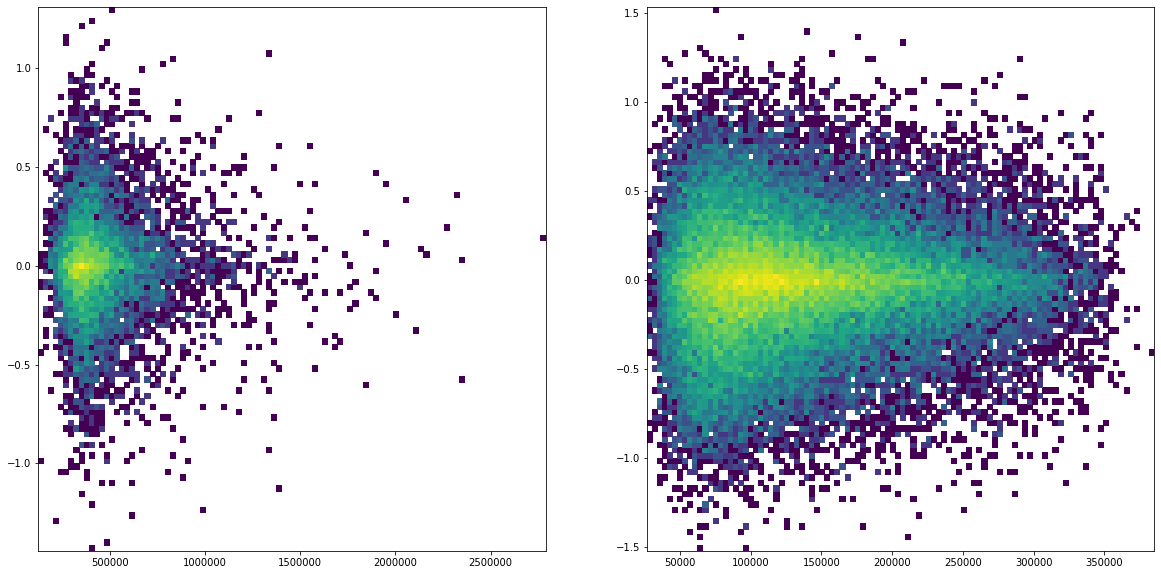

In [121]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
_=ax[0].hist2d(features_array[label0,15], KIN_diff[label0],bins=100,norm=LogNorm())
_=ax[1].hist2d(features_array[label1,15], KIN_diff[label1],bins=100,norm=LogNorm())

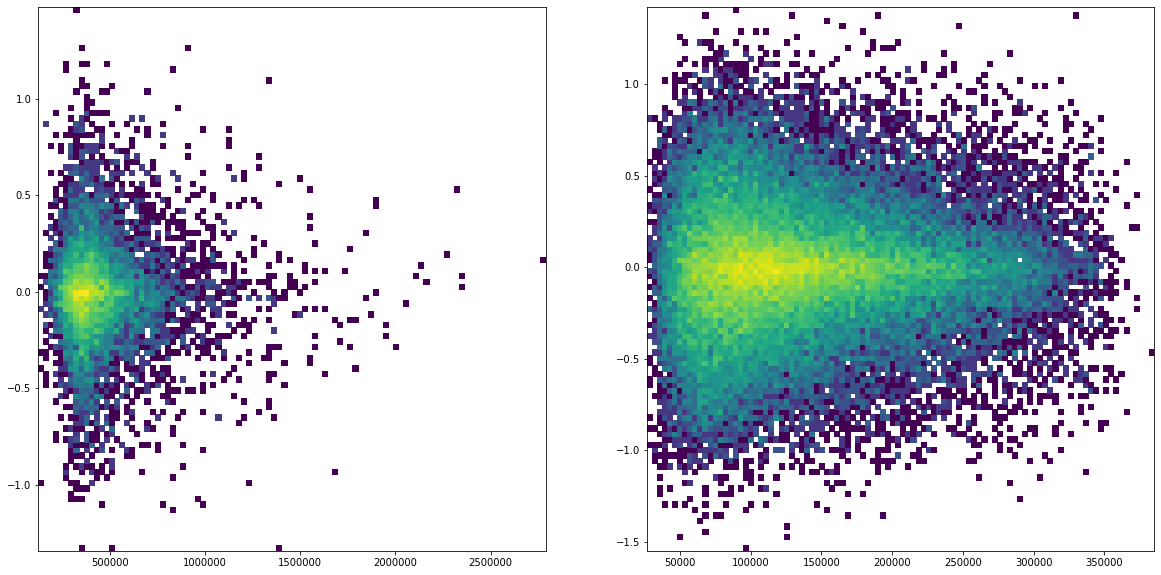

In [122]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
_=ax[0].hist2d(features_array[label0,15], NW_diff[label0],bins=100,norm=LogNorm())
_=ax[1].hist2d(features_array[label1,15], NW_diff[label1],bins=100,norm=LogNorm())